## Clusterização Particional na Prática

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")

import warnings
warnings.filterwarnings('ignore')

In [31]:
# arquivo original countries of the world.csv
df = pd.read_csv('data/paises_do_mundo.csv')
df.dropna(inplace=True)
df.head()

,pais,regiao,populacao,area,densidade_populacional,costa,imigracao,mortalidade_infantil,pib_per_capta,perc_alfabetizacao,telefones,pec_aravel,perc_plantacao,perc_outras,clima,taxa_nascimento,taxa_mortalidade,agricultura,industria,servicos
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


In [32]:
X = df.iloc[:, 4:10].copy()
X

,densidade_populacional,costa,imigracao,mortalidade_infantil,pib_per_capta,perc_alfabetizacao
0,48.0,0.00,23.06,163.07,700.0,36.0
1,124.6,1.26,-4.93,21.52,4500.0,86.5
2,13.8,0.04,-0.39,31.00,6000.0,70.0
6,132.1,59.80,10.76,21.03,8600.0,95.0
7,156.0,34.54,-6.15,19.46,11000.0,89.0
...,...,...,...,...,...,...
218,28.2,0.31,-0.04,22.20,4800.0,93.4
219,256.1,1.05,-0.45,25.95,2500.0,90.3
224,40.6,0.36,0.00,61.50,800.0,50.2
225,15.3,0.00,0.00,88.29,800.0,80.6


In [33]:
# informação desnecessária
X.drop('costa', axis=1, inplace=True)

In [34]:
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

In [35]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [36]:
# visualização 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_)

print(pca.explained_variance_ratio_)

[0.68280947 0.18073361]


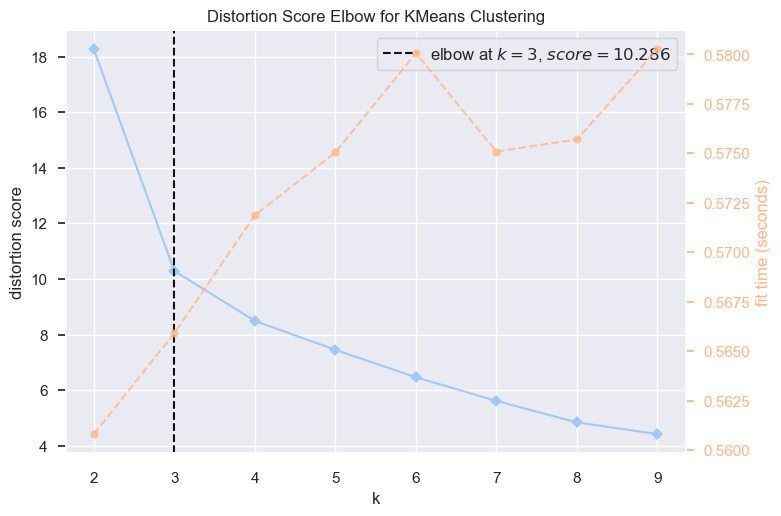

In [37]:
# Encontrando número ideal de K's
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=True)
visualizer.fit(X_)
visualizer.show();

In [38]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=3, n_init="auto")
kmeans.fit(X_)
labels = kmeans.labels_

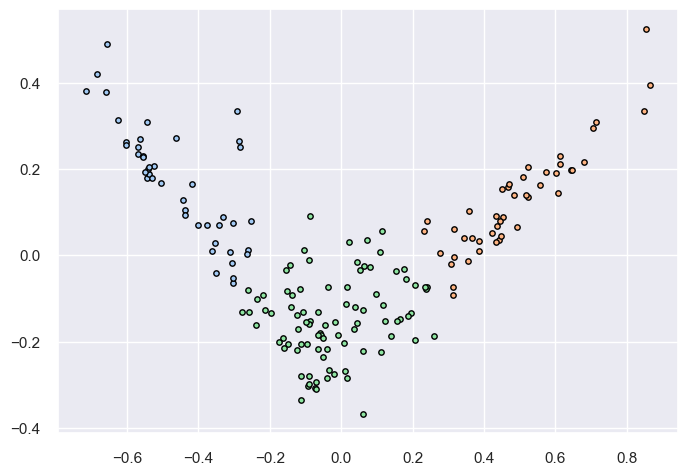

In [39]:
# Dados Reais
for n in range(k):
    plt.scatter(pca_features[labels == n, 0], pca_features[labels == n, 1], edgecolors='black', s=15)
plt.plot();   

In [40]:
X['cluster'] = labels
X.groupby(by='cluster').mean()

,densidade_populacional,imigracao,mortalidade_infantil,pib_per_capta,perc_alfabetizacao
cluster,,,,,
0,866.975000,3.251818,7.297500,24120.454545,96.188636
1,101.344444,0.382889,85.883111,1431.111111,52.646667
2,111.807778,-2.192000,30.854889,5642.222222,89.628889
